<a href="https://colab.research.google.com/github/anubhavgupta1/DeepLearning/blob/master/17_Sequence_Models___RNN_LSTM_GRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

1. Introduce dataset 
2. Data processing - Test-train split, encoding, visualisation
3. Basic RNN - testing inference
4. Evaluation and training
5. LSTM
6. GRU
7. Exercises

In [0]:
from io import open
import os, string, random, time, math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
import torch
import torch.nn as nn
import torch.optim as optim

In [0]:
from IPython.display import clear_output

In [5]:
# RUN THIS ONLY IF YOU ARE IN GOOGLE COLAB NOTEBOOK
!ls
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("drive/Deep Learning")
!ls

sample_data
E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 145113 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.17-0ubuntu2~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.17-0ubuntu2~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0

In [6]:
!pwd

/content/drive/Deep Learning


In [7]:
!ls

drive		     mobile_cleaned2.csv  name2lang.txt  network_rnn.JPG
mobile_cleaned1.csv  mobile_cleaned.csv   net.jpg	 Projects


## Dataset

In [0]:
languages = []
data = []
X = []
y = []

with open('name2lang.txt', 'r') as f: 
    for line in f:
        line = line.split(',')
        name = line[0].strip()
        lang = line[1].strip()
        if not lang in languages:
            languages.append(lang)
        X.append(name)
        y.append(lang)
        data.append((name, lang))

n_languages = len(languages)

In [9]:
print(type(languages))
print(type(data))

<class 'list'>
<class 'list'>


In [10]:
print(*languages, sep = "\n")

Portuguese
Irish
Spanish
Vietnamese
Chinese
Greek
Czech
Dutch
Japanese
French
German
Scottish
English
Russian
Polish
Arabic
Korean
Italian


In [11]:
print("Total Languages = " + str(len(languages)))

Total Languages = 18


In [12]:
print(*data[0:10], sep = "\n")

('Abreu', 'Portuguese')
('Albuquerque', 'Portuguese')
('Almeida', 'Portuguese')
('Alves', 'Portuguese')
('Araujo', 'Portuguese')
('Araullo', 'Portuguese')
('Barros', 'Portuguese')
('Basurto', 'Portuguese')
('Belo', 'Portuguese')
('Cabral', 'Portuguese')


### Train-test split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [14]:
print(*X_train, sep = "\n")

Streaming output truncated to the last 5000 lines.
Peltser
Habirov
Vesnitsky
Cvacek
Zhelezovsky
Tsapov
Cornish
Vainer
Tokmakov
GalkinVraskoi
Maksyutenko
Shibukji
Mulligan
Rustamov
Jokin
Everstov
Kassis
Kawaii
Natareev
Tsidilkovsky
Levann
Kalatin
Djumabaev
Yan
Nemoto
Nomura
Cermak
Devaney
Nudatov
Baiburin
Jegulin
Loifman
Turetskov
Portoghese
Abulhanov
Pypin
Yakushin
Steel
Iesada
Mcneill
Albert
Pavlusenko
Mordvinov
Antushevsky
Ustenko
Shichirobei
Andronnikov
Provenzano
Ableukhov
Masih
Botros
Zelentsov
Djirin
Norsworthy
Borghi
Slezak
Rockliffe
Dewar
Guidi
Fabre
Marie
Zhohin
Veletsky
Milward
Herrmann
Hassan
Lichtenberg
Maille
Zinin
Wallis
Holoshevsky
Pochuev
Novosilsky
Groisman
Fedchenko
Gorecki
Zhornyak
Huerta
Strobel
Kitoaji
Glukhman
Bran
Aquino
Whitmore
Deshkin
Negri
Yudahin
Avramtchik
Pherigo
Moghadam
Tchalovsky
Turubanov
Wood
Dudnik
Malouf
Vinkler
Tocher
Chan
Dogadin
Hyobanshi
Fremut
Jirmunsky
Ambrosi
Morello
Balanev
Waters
Avtsyn
Tovstyko
Farrow
Takashi
Abbakumov
Harper
Mackenzie
Kal

In [15]:
print(len(X_train), len(X_test))

16040 4010


### Encoding names and language

In [0]:
#for Y we will do one hot encoding

In [17]:
print(*string.ascii_letters,sep='\n')

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
A
B
C
D
E
F
G
H
I
J
K
L
M
N
O
P
Q
R
S
T
U
V
W
X
Y
Z


In [0]:
all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)

In [19]:
print(n_letters)

57


In [0]:
def name_rep(name):
    rep = torch.zeros(len(name), 1, n_letters)
    for index, letter in enumerate(name):
        pos = all_letters.find(letter)
        rep[index][0][pos] = 1
    return rep

In [21]:
name_rep('Abreu')

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0

In [0]:
def lang_rep(lang):
    return torch.tensor([languages.index(lang)], dtype=torch.long)

In [23]:
lang_rep('Scottish')

tensor([11])

### Basic visualisation

In [0]:
count = {}
for l in languages: 
    count[l] = 0
for d in data:
    count[d[1]] += 1

In [25]:
print(count)
print(count.keys())
print(count.values())

{'Portuguese': 74, 'Irish': 232, 'Spanish': 298, 'Vietnamese': 73, 'Chinese': 268, 'Greek': 203, 'Czech': 519, 'Dutch': 297, 'Japanese': 991, 'French': 277, 'German': 724, 'Scottish': 100, 'English': 3668, 'Russian': 9384, 'Polish': 139, 'Arabic': 2000, 'Korean': 94, 'Italian': 709}
dict_keys(['Portuguese', 'Irish', 'Spanish', 'Vietnamese', 'Chinese', 'Greek', 'Czech', 'Dutch', 'Japanese', 'French', 'German', 'Scottish', 'English', 'Russian', 'Polish', 'Arabic', 'Korean', 'Italian'])
dict_values([74, 232, 298, 73, 268, 203, 519, 297, 991, 277, 724, 100, 3668, 9384, 139, 2000, 94, 709])


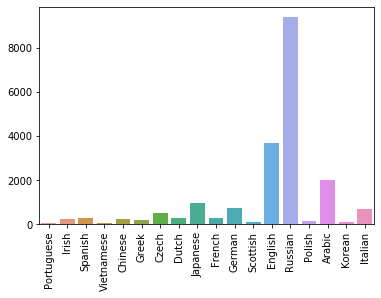

In [26]:
plt_ = sns.barplot(list(count.keys()), list(count.values()))
plt_.set_xticklabels(plt_.get_xticklabels(), rotation=450)
plt.show()

## Basic network and testing inference

In [0]:
class RNN_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN_net, self).__init__()
        self.hidden_size = hidden_size
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, input_, hidden):      
        combined = torch.cat((input_, hidden), 1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.hidden_size)

In [0]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)

In [29]:
print(net)

RNN_net(
  (i2h): Linear(in_features=185, out_features=128, bias=True)
  (i2o): Linear(in_features=185, out_features=18, bias=True)
  (softmax): LogSoftmax()
)


In [0]:
def find_parameters(x):
  total_parameters = 0
  for param in x:
    a = param.shape
    print(a)
    i = 0
    temp = 1
    while i < len(a):
      temp = temp * a[i]
      i = i + 1
    total_parameters = total_parameters + temp
  print("Total Parameters = ",total_parameters)

In [31]:
print(find_parameters(net.parameters()))

torch.Size([128, 185])
torch.Size([128])
torch.Size([18, 185])
torch.Size([18])
Total Parameters =  27156
None


In [0]:
def infer(net, name):
    net.eval()
    name_ohe = name_rep(name)
    hidden = net.init_hidden()# initialisation of hidden layer
    
    for i in range(name_ohe.size()[0]):
        output, hidden = net(name_ohe[i], hidden)
    
    return output # this is the output at last time step

In [33]:
output = infer(net, 'Adam')
index = torch.argmax(output)
print(output, index)

tensor([[-2.8234, -2.8478, -2.8510, -2.8821, -2.8875, -2.9207, -2.9694, -2.9219,
         -2.8421, -3.0061, -2.8326, -3.0192, -2.8801, -2.9656, -2.7941, -2.8573,
         -2.8208, -2.9423]], grad_fn=<LogSoftmaxBackward>) tensor(14)


In [34]:
val, ind = output.topk(3)
print("val ", val,"\n" ,"index = ", ind)

val  tensor([[-2.7941, -2.8208, -2.8234]], grad_fn=<TopkBackward>) 
 index =  tensor([[14, 16,  0]])


In [35]:
print(index in ind)

True


In [36]:
languages[index.item()]

'Polish'

## Evaluate model

In [0]:
def dataloader(npoints, X_, y_):
    to_ret = []
    for i in range(npoints):
        index_ = np.random.randint(len(X_))
        name, lang = X_[index_], y_[index_]
        to_ret.append((name, lang, name_rep(name), lang_rep(lang)))
    return to_ret

In [38]:
dataloader(2, X_train, y_train)

[('Zhardetsky',
  'Russian',
  tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            0., 0., 0., 0., 0., 0.]],
  
          [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
            1., 0., 0., 0., 0., 0., 0., 0., 0., 

In [0]:
def eval(net, n_points, k, X_, y_):
    
    data_ = dataloader(n_points, X_, y_)
    correct = 0
    
    for name, language, name_ohe, lang_rep in data_:
        
        output = infer(net, name)
        val, indices = output.topk(k) # topk is available in pytorch
        
        if lang_rep in indices:
            correct += 1
            
    accuracy = correct/n_points
    return accuracy

In [40]:
eval(net, 1000, 3, X_test, y_test)

0.074

In [41]:
eval(net, 1000, 10, X_test, y_test)

0.38

## Training

### Basic setup

In [0]:
def train(net, opt, criterion, n_points):
    
    opt.zero_grad()
    total_loss = 0
    
    data_ = dataloader(n_points, X_train, y_train)
    
    for name, language, name_ohe, lang_rep in data_:

        hidden = net.init_hidden()

        for i in range(name_ohe.size()[0]):
            output, hidden = net(name_ohe[i], hidden)
            
        loss = criterion(output, lang_rep)
        loss.backward(retain_graph=True)
        
        total_loss += loss
        
    opt.step()       
            
    return total_loss/n_points

In [0]:
criterion = nn.NLLLoss() # non negative loss likelihood
opt = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [0]:
#if our network has softmax then we use nnll otherwise cross entropy loss

In [45]:
%%time 
train(net, opt, criterion, 200)

CPU times: user 293 ms, sys: 27.5 ms, total: 321 ms
Wall time: 362 ms


tensor(2.9036, grad_fn=<DivBackward0>)

In [46]:
eval(net, 1000, 1, X_test, y_test)

0.459

In [47]:
x = np.zeros(5+1)
for i in range(5):
  x[i+1] = x[i]*i
print(x)


[0. 0. 0. 0. 0. 0.]


### Full training setup

In [0]:
def train_setup(net, lr = 0.01, n_batches = 100, batch_size = 10, momentum = 0.9, display_freq=5):
    
    criterion = nn.NLLLoss()
    opt = optim.SGD(net.parameters(), lr=lr, momentum=momentum)
    
    loss_arr = np.zeros(n_batches + 1)
    
    for i in range(n_batches):
        loss_temp = train(net, opt, criterion, batch_size)
        loss_arr[i+1] = (loss_arr[i]*i + loss_temp )/(i + 1)
        
        if i%display_freq == display_freq-1:
            #clear_output(wait=True)
            
            print('Iteration = ', i,"\n", 'Top-1 Accuracy = ', eval(net, len(X_test), 1, X_test, y_test),"\n", 'Top-2 Accuracy = ', eval(net, len(X_test), 2, X_test, y_test), "\n",'Loss = ', loss_arr[i])
            plt.figure()
            plt.plot(loss_arr[1:i], '-*')
            plt.xlabel('Iteration')
            plt.ylabel('Loss')
            plt.show()
            print('\n\n')
                      

Iteration =  4 
 Top-1 Accuracy =  0.45311720698254365 
 Top-2 Accuracy =  0.6523690773067332 
 Loss =  2.745494842529297


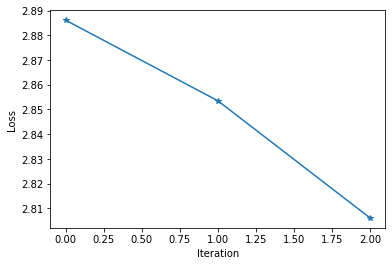




Iteration =  9 
 Top-1 Accuracy =  0.4458852867830424 
 Top-2 Accuracy =  0.6498753117206982 
 Loss =  2.388618230819702


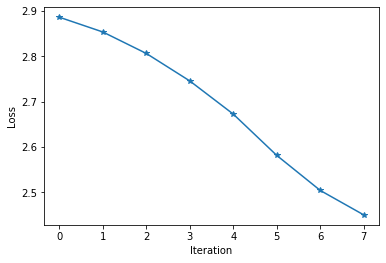




Iteration =  14 
 Top-1 Accuracy =  0.4690773067331671 
 Top-2 Accuracy =  0.6523690773067332 
 Loss =  2.1807050704956055


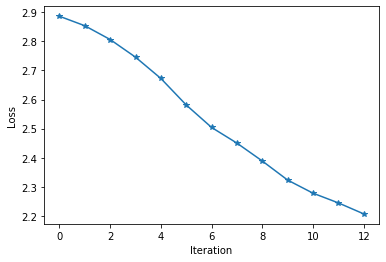




Iteration =  19 
 Top-1 Accuracy =  0.4758104738154613 
 Top-2 Accuracy =  0.6591022443890274 
 Loss =  2.0478549003601074


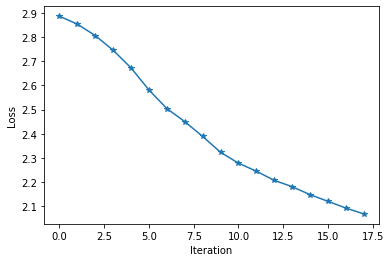




Iteration =  24 
 Top-1 Accuracy =  0.528927680798005 
 Top-2 Accuracy =  0.7012468827930175 
 Loss =  1.9530649185180664


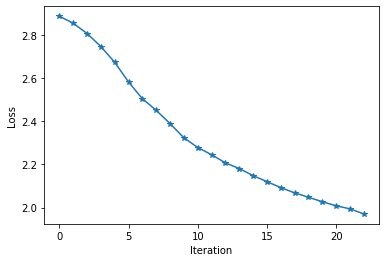




Iteration =  29 
 Top-1 Accuracy =  0.5249376558603491 
 Top-2 Accuracy =  0.6593516209476309 
 Loss =  1.8801264762878418


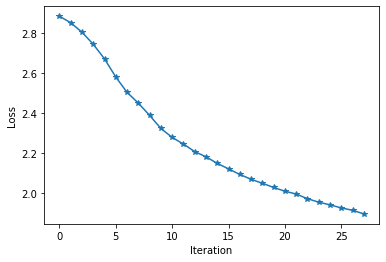




Iteration =  34 
 Top-1 Accuracy =  0.5620947630922694 
 Top-2 Accuracy =  0.6972568578553616 
 Loss =  1.8160052299499512


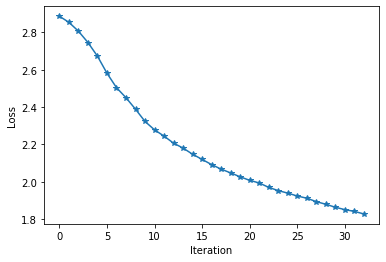




Iteration =  39 
 Top-1 Accuracy =  0.5655860349127182 
 Top-2 Accuracy =  0.7341645885286783 
 Loss =  1.763624906539917


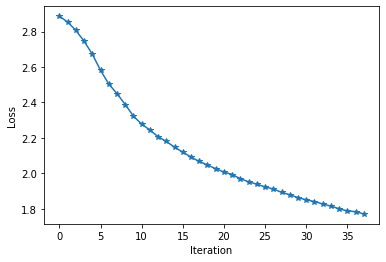




Iteration =  44 
 Top-1 Accuracy =  0.5518703241895262 
 Top-2 Accuracy =  0.6912718204488778 
 Loss =  1.7210043668746948


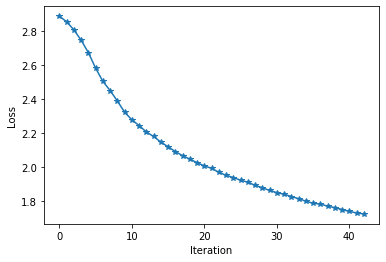




Iteration =  49 
 Top-1 Accuracy =  0.5905236907730673 
 Top-2 Accuracy =  0.7137157107231921 
 Loss =  1.6873565912246704


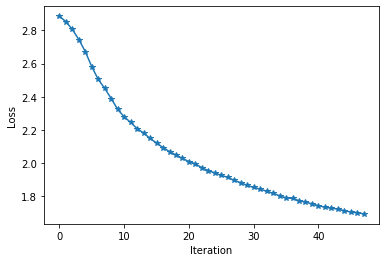




Iteration =  54 
 Top-1 Accuracy =  0.602493765586035 
 Top-2 Accuracy =  0.7144638403990025 
 Loss =  1.6554123163223267


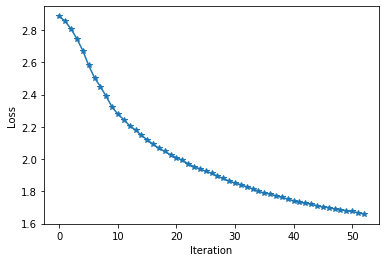




Iteration =  59 
 Top-1 Accuracy =  0.6052369077306733 
 Top-2 Accuracy =  0.7521197007481297 
 Loss =  1.626657247543335


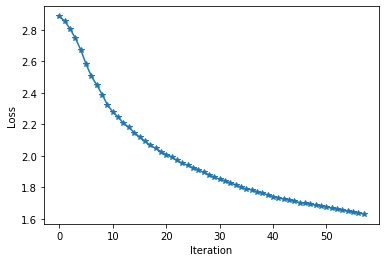




Iteration =  64 
 Top-1 Accuracy =  0.6336658354114714 
 Top-2 Accuracy =  0.7566084788029925 
 Loss =  1.5942797660827637


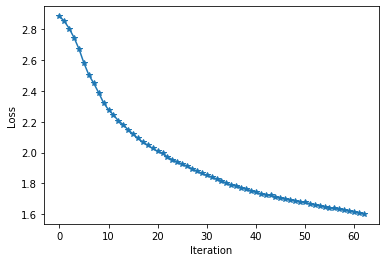




Iteration =  69 
 Top-1 Accuracy =  0.6463840399002494 
 Top-2 Accuracy =  0.7625935162094764 
 Loss =  1.5762678384780884


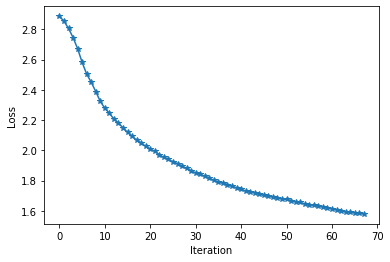




Iteration =  74 
 Top-1 Accuracy =  0.6483790523690773 
 Top-2 Accuracy =  0.7635910224438903 
 Loss =  1.553812861442566


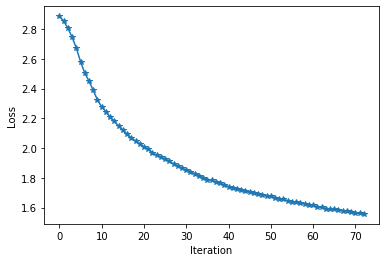




Iteration =  79 
 Top-1 Accuracy =  0.655860349127182 
 Top-2 Accuracy =  0.7660847880299252 
 Loss =  1.5360321998596191


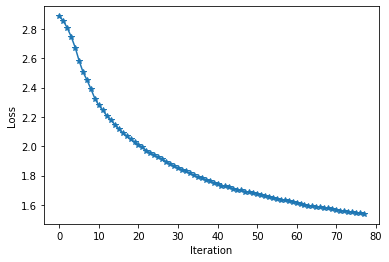




Iteration =  84 
 Top-1 Accuracy =  0.629925187032419 
 Top-2 Accuracy =  0.7543640897755611 
 Loss =  1.5137125253677368


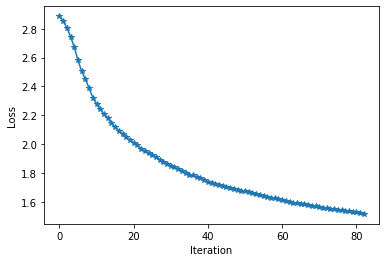




Iteration =  89 
 Top-1 Accuracy =  0.6463840399002494 
 Top-2 Accuracy =  0.7788029925187032 
 Loss =  1.4925391674041748


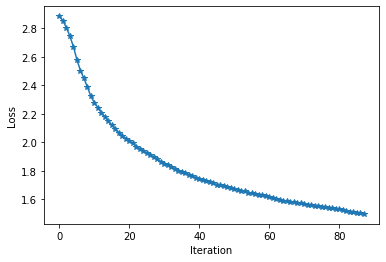




Iteration =  94 
 Top-1 Accuracy =  0.6386533665835411 
 Top-2 Accuracy =  0.7728179551122194 
 Loss =  1.472740650177002


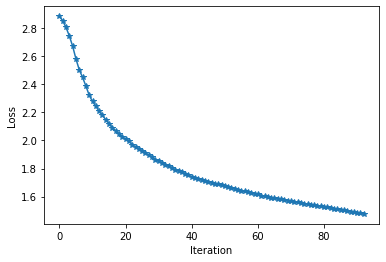




Iteration =  99 
 Top-1 Accuracy =  0.6690773067331671 
 Top-2 Accuracy =  0.7827930174563591 
 Loss =  1.4552761316299438


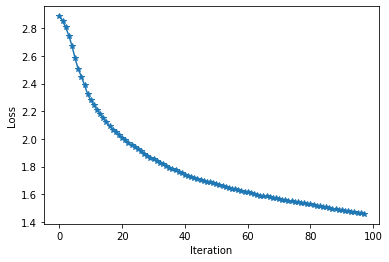

In [49]:
n_hidden = 128
net = RNN_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

## LSTM cell

In [0]:
class LSTM_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM_net, self).__init__()
        self.hidden_size = hidden_size
        self.lstm_cell = nn.LSTM(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_, hidden):
        out, hidden = self.lstm_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden[0])
        output = self.softmax(output)
        return output.view(1, -1), hidden
    
    def init_hidden(self):
        return (torch.zeros(1, 1, self.hidden_size), torch.zeros(1, 1, self.hidden_size))

Iteration =  4 
 Top-1 Accuracy =  0.46733167082294264 
 Top-2 Accuracy =  0.6478802992518703 
 Loss =  2.814723491668701


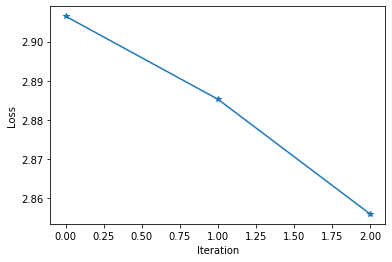




Iteration =  9 
 Top-1 Accuracy =  0.4613466334164589 
 Top-2 Accuracy =  0.654364089775561 
 Loss =  2.5158214569091797


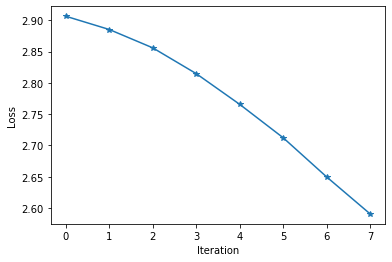




Iteration =  14 
 Top-1 Accuracy =  0.4653366583541147 
 Top-2 Accuracy =  0.640648379052369 
 Loss =  2.3593204021453857


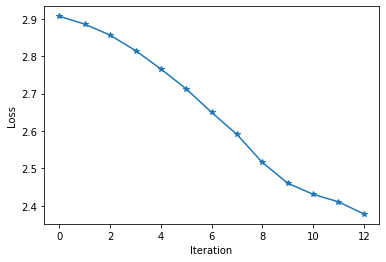




Iteration =  19 
 Top-1 Accuracy =  0.35112219451371574 
 Top-2 Accuracy =  0.6468827930174563 
 Loss =  2.23667573928833


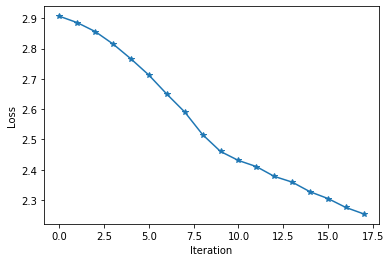




Iteration =  24 
 Top-1 Accuracy =  0.46633416458852867 
 Top-2 Accuracy =  0.6483790523690773 
 Loss =  2.155588388442993


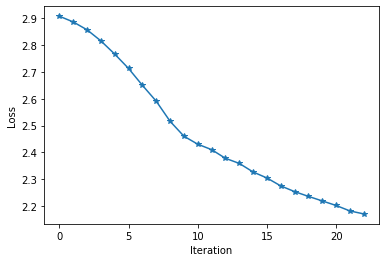




Iteration =  29 
 Top-1 Accuracy =  0.45760598503740646 
 Top-2 Accuracy =  0.654364089775561 
 Loss =  2.0974152088165283


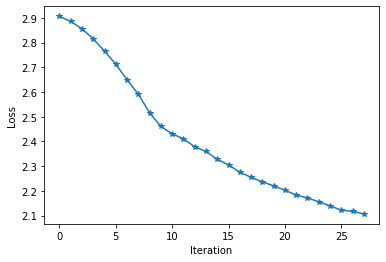




Iteration =  34 
 Top-1 Accuracy =  0.47955112219451373 
 Top-2 Accuracy =  0.6503740648379053 
 Loss =  2.062796115875244


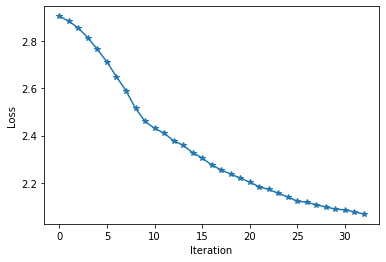




Iteration =  39 
 Top-1 Accuracy =  0.4685785536159601 
 Top-2 Accuracy =  0.6643391521197007 
 Loss =  2.037764310836792


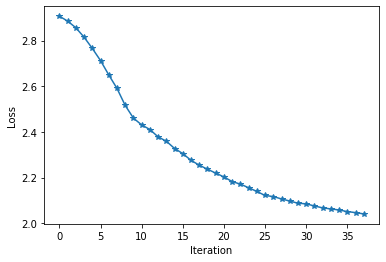




Iteration =  44 
 Top-1 Accuracy =  0.46159600997506234 
 Top-2 Accuracy =  0.6653366583541147 
 Loss =  2.0193002223968506


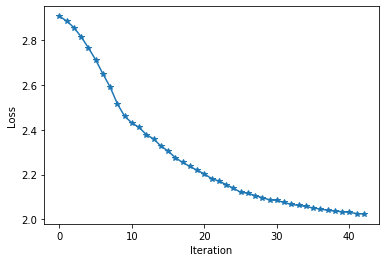




Iteration =  49 
 Top-1 Accuracy =  0.4748129675810474 
 Top-2 Accuracy =  0.6396508728179551 
 Loss =  2.0002529621124268


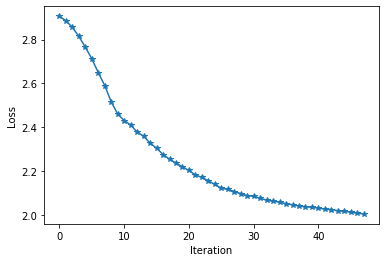




Iteration =  54 
 Top-1 Accuracy =  0.46109725685785535 
 Top-2 Accuracy =  0.6403990024937656 
 Loss =  1.9824129343032837


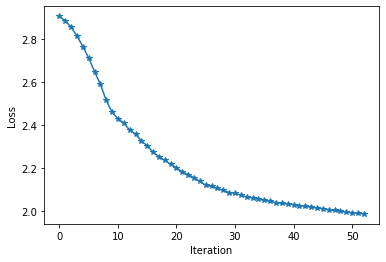




Iteration =  59 
 Top-1 Accuracy =  0.47082294264339153 
 Top-2 Accuracy =  0.6364089775561097 
 Loss =  1.9624345302581787


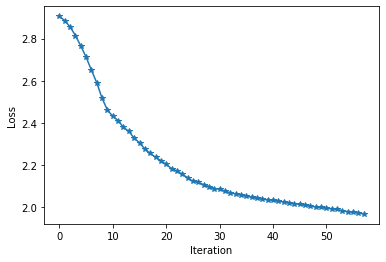




Iteration =  64 
 Top-1 Accuracy =  0.4683291770573566 
 Top-2 Accuracy =  0.6591022443890274 
 Loss =  1.9426398277282715


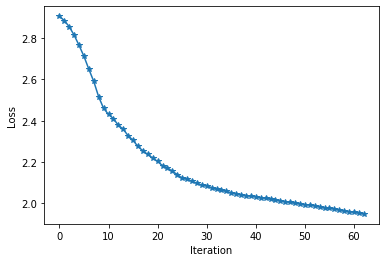




Iteration =  69 
 Top-1 Accuracy =  0.4880299251870324 
 Top-2 Accuracy =  0.654364089775561 
 Loss =  1.9240052700042725


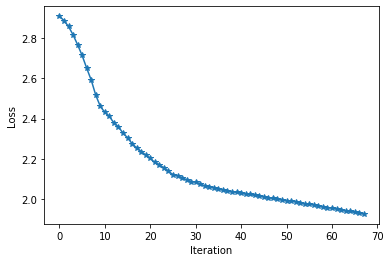




Iteration =  74 
 Top-1 Accuracy =  0.499501246882793 
 Top-2 Accuracy =  0.6478802992518703 
 Loss =  1.902012825012207


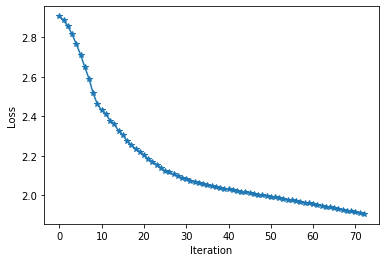




Iteration =  79 
 Top-1 Accuracy =  0.5209476309226932 
 Top-2 Accuracy =  0.685286783042394 
 Loss =  1.8857231140136719


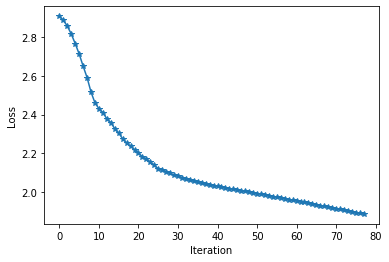




Iteration =  84 
 Top-1 Accuracy =  0.5039900249376559 
 Top-2 Accuracy =  0.6802992518703241 
 Loss =  1.8655637502670288


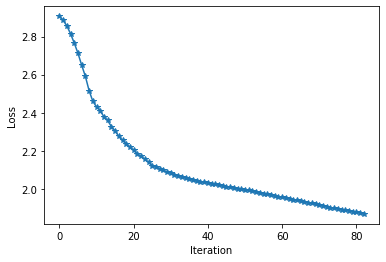




Iteration =  89 
 Top-1 Accuracy =  0.5399002493765586 
 Top-2 Accuracy =  0.6847880299251871 
 Loss =  1.8446918725967407


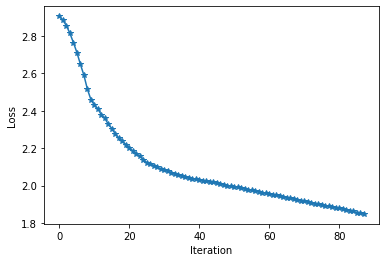




Iteration =  94 
 Top-1 Accuracy =  0.5421446384039901 
 Top-2 Accuracy =  0.6760598503740648 
 Loss =  1.8266239166259766


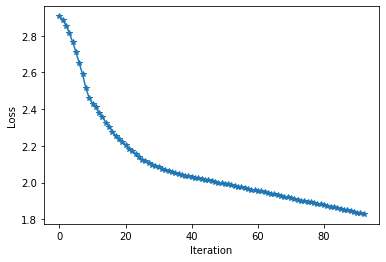




Iteration =  99 
 Top-1 Accuracy =  0.5531172069825436 
 Top-2 Accuracy =  0.6930174563591023 
 Loss =  1.8121894598007202


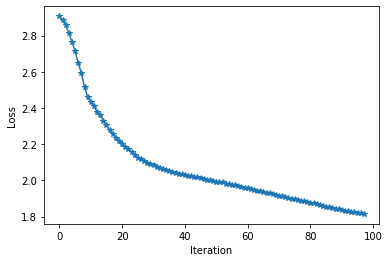

In [51]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

## GRU Cell

In [0]:
class GRU_net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRU_net, self).__init__()
        self.hidden_size = hidden_size
        self.gru_cell = nn.GRU(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=2)
    
    def forward(self, input_, hidden):
        out, hidden = self.gru_cell(input_.view(1, 1, -1), hidden)
        output = self.h2o(hidden)
        output = self.softmax(output)
        return output.view(1, -1), hidden
    
    def init_hidden(self):
        return torch.zeros(1, 1, self.hidden_size)

Iteration =  4 
 Top-1 Accuracy =  0.45660847880299255 
 Top-2 Accuracy =  0.6503740648379053 
 Loss =  2.8173458576202393


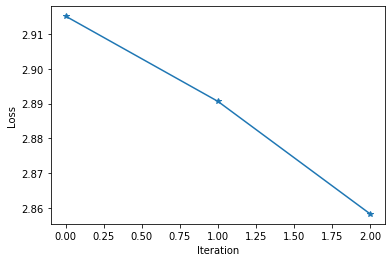




Iteration =  9 
 Top-1 Accuracy =  0.46982543640897756 
 Top-2 Accuracy =  0.6556109725685786 
 Loss =  2.525315999984741


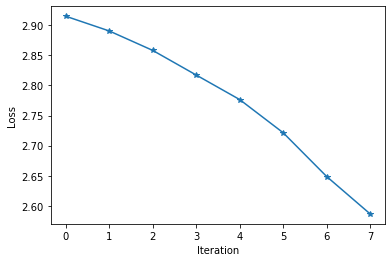




Iteration =  14 
 Top-1 Accuracy =  0.4780548628428928 
 Top-2 Accuracy =  0.6503740648379053 
 Loss =  2.326333999633789


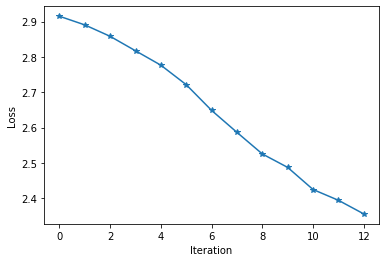




Iteration =  19 
 Top-1 Accuracy =  0.3491271820448878 
 Top-2 Accuracy =  0.643640897755611 
 Loss =  2.2027127742767334


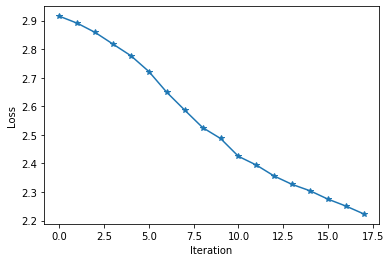




Iteration =  24 
 Top-1 Accuracy =  0.46508728179551123 
 Top-2 Accuracy =  0.6423940149625935 
 Loss =  2.138946056365967


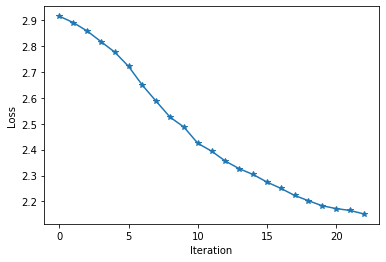




Iteration =  29 
 Top-1 Accuracy =  0.47531172069825434 
 Top-2 Accuracy =  0.6466334164588529 
 Loss =  2.0805985927581787


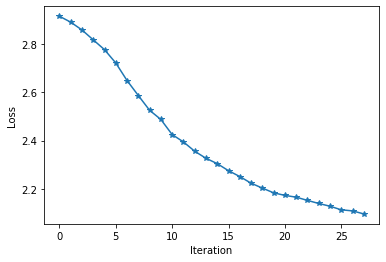




Iteration =  34 
 Top-1 Accuracy =  0.46982543640897756 
 Top-2 Accuracy =  0.657356608478803 
 Loss =  2.0513103008270264


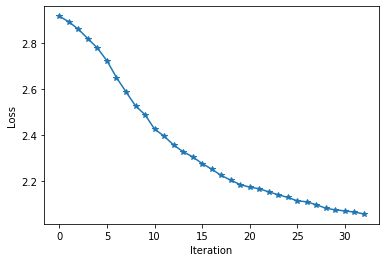




Iteration =  39 
 Top-1 Accuracy =  0.46458852867830425 
 Top-2 Accuracy =  0.6581047381546135 
 Loss =  2.0173099040985107


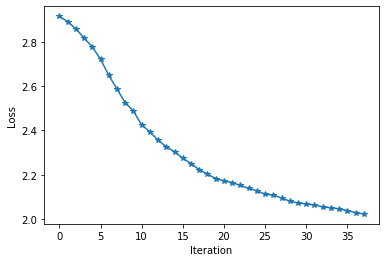




Iteration =  44 
 Top-1 Accuracy =  0.4648379052369077 
 Top-2 Accuracy =  0.6491271820448877 
 Loss =  1.992479681968689


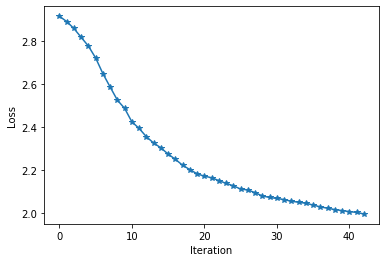




Iteration =  49 
 Top-1 Accuracy =  0.45187032418952616 
 Top-2 Accuracy =  0.640648379052369 
 Loss =  1.9665166139602661


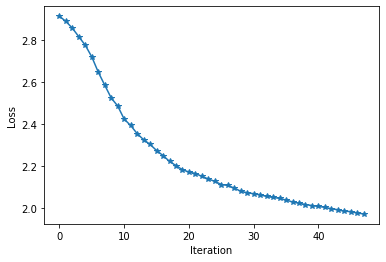




Iteration =  54 
 Top-1 Accuracy =  0.4458852867830424 
 Top-2 Accuracy =  0.6483790523690773 
 Loss =  1.9432209730148315


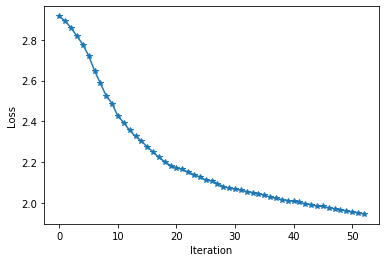




Iteration =  59 
 Top-1 Accuracy =  0.47032418952618454 
 Top-2 Accuracy =  0.6401496259351621 
 Loss =  1.9298856258392334


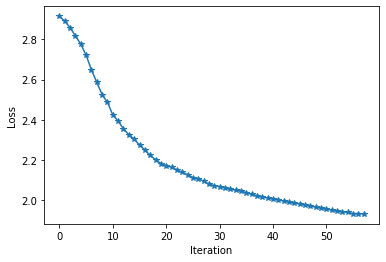




Iteration =  64 
 Top-1 Accuracy =  0.46708229426433917 
 Top-2 Accuracy =  0.6418952618453866 
 Loss =  1.9189335107803345


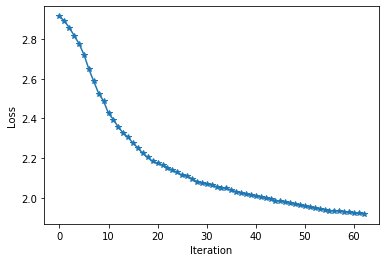




Iteration =  69 
 Top-1 Accuracy =  0.48703241895261845 
 Top-2 Accuracy =  0.6618453865336659 
 Loss =  1.902467131614685


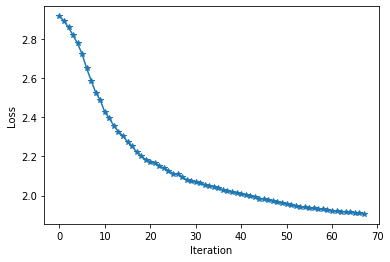




Iteration =  74 
 Top-1 Accuracy =  0.5044887780548628 
 Top-2 Accuracy =  0.6738154613466334 
 Loss =  1.8800644874572754


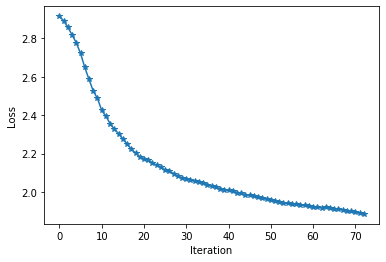




Iteration =  79 
 Top-1 Accuracy =  0.5249376558603491 
 Top-2 Accuracy =  0.6718204488778055 
 Loss =  1.8621097803115845


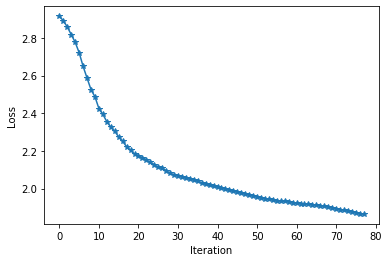




Iteration =  84 
 Top-1 Accuracy =  0.5286783042394015 
 Top-2 Accuracy =  0.6768079800498753 
 Loss =  1.8407756090164185


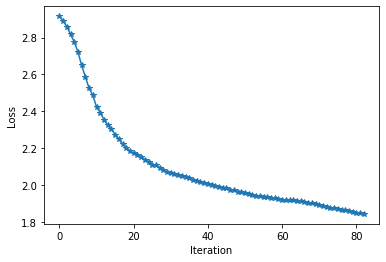




Iteration =  89 
 Top-1 Accuracy =  0.528428927680798 
 Top-2 Accuracy =  0.6730673316708229 
 Loss =  1.8236013650894165


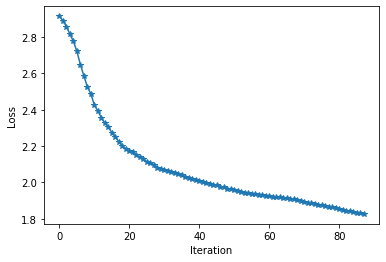




Iteration =  94 
 Top-1 Accuracy =  0.5401496259351621 
 Top-2 Accuracy =  0.6840399002493766 
 Loss =  1.8087462186813354


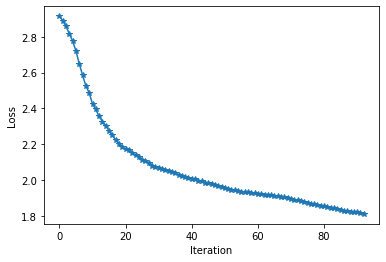




Iteration =  99 
 Top-1 Accuracy =  0.556857855361596 
 Top-2 Accuracy =  0.685785536159601 
 Loss =  1.7940847873687744


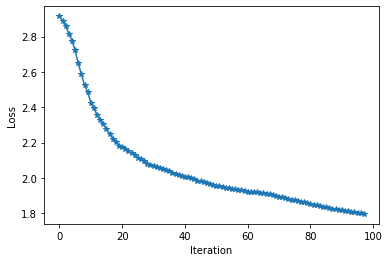

In [53]:
n_hidden = 128
net = LSTM_net(n_letters, n_hidden, n_languages)
train_setup(net, lr=0.0005, n_batches=100, batch_size = 256)

## Exercises

0. Compute language-wise accuracy, plot confusion matrix 
1. Play with hyper-parameters (includes hidden layer size) and try to get better results
2. Observe gradient explosion at higher learning rates
3. Increase performance by moving to GPUs (shown earlier)
4. Think about how to increase performance further (idea: are we benefiting from batching in our implementation?)
